In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [5]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

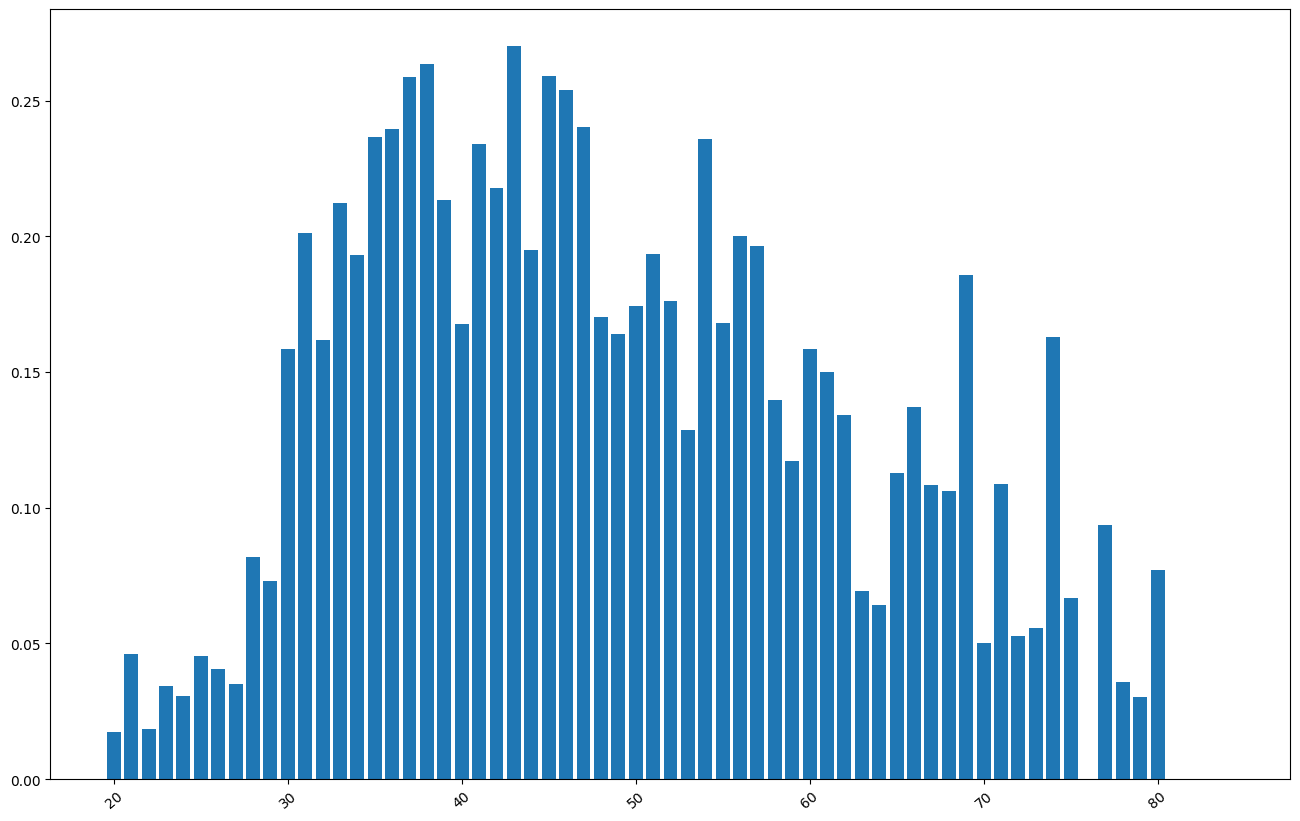

In [6]:
### Your code is here

### Средний таргет по возрасту

main_category = data.groupby('Age')['Response'].mean()
main_category = main_category.sort_values()

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.bar(main_category.index, main_category)
plt.xticks(rotation=40)

plt.show()

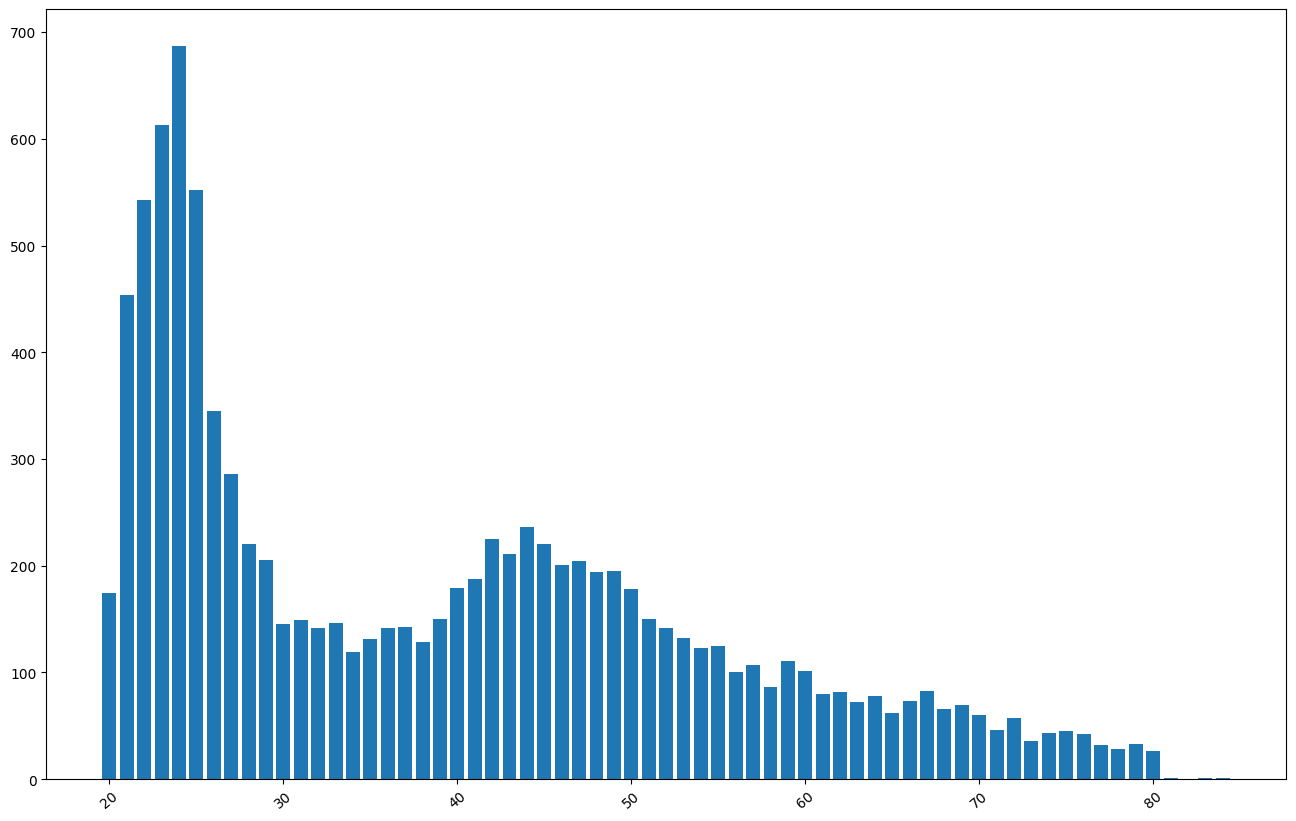

In [7]:
### Проверим количество людей с определенным возрастом в нашей выборке


main_category_count = data.groupby('Age')['Response'].count()

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.bar(main_category_count.index, main_category_count)
plt.xticks(rotation=40)

plt.show()

In [8]:
object_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=object_columns, prefix=object_columns, drop_first=True)

data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,True,False,True,True
1,76,1,3.0,0,33536.0,26.0,183,0,True,False,False,False
2,47,1,28.0,0,38294.0,26.0,27,1,True,False,True,True
3,21,1,11.0,1,28619.0,152.0,203,0,True,True,False,False
4,29,1,41.0,1,27496.0,152.0,39,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,False,True,False,False
9996,28,1,35.0,1,23589.0,160.0,173,0,True,True,False,False
9997,27,1,15.0,0,33340.0,152.0,207,0,False,True,False,True
9998,28,1,14.0,1,25426.0,152.0,247,0,False,True,False,False


In [9]:
pd.concat((data.drop(columns=['Response'], axis=1), data['Response']), axis=1).corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response
Age,1.000000,-0.081323,0.030638,-0.261456,0.081564,-0.576066,0.000030,0.147247,-0.786152,0.215567,0.272217,0.113888
Driving_License,-0.081323,1.000000,0.004926,0.020464,-0.014338,0.044335,0.002704,-0.013021,0.041034,0.009672,-0.024279,0.011263
Region_Code,0.030638,0.004926,1.000000,-0.021270,-0.012213,-0.039733,-0.008527,-0.013752,-0.032529,0.010691,0.027217,0.010230
Previously_Insured,-0.261456,0.020464,-0.021270,1.000000,-0.005164,0.224719,0.022350,-0.074734,0.363702,-0.181954,-0.814075,-0.333502
Annual_Premium,0.081564,-0.014338,-0.012213,-0.005164,1.000000,-0.123851,-0.008878,0.024029,-0.027968,0.066245,0.027671,0.029839
Policy_Sales_Channel,-0.576066,0.044335,-0.039733,0.224719,-0.123851,1.000000,-0.006131,-0.113310,0.565246,-0.150138,-0.227451,-0.146421
Vintage,0.000030,0.002704,-0.008527,0.022350,-0.008878,-0.006131,1.000000,-0.000259,-0.003194,-0.027596,-0.013241,-0.007187
Gender_Male,0.147247,-0.013021,-0.013752,-0.074734,0.024029,-0.113310,-0.000259,1.000000,-0.166218,0.037304,0.083052,0.049227
Vehicle_Age_< 1 Year,-0.786152,0.041034,-0.032529,0.363702,-0.027968,0.565246,-0.003194,-0.166218,1.000000,-0.180000,-0.367430,-0.224161
Vehicle_Age_> 2 Years,0.215567,0.009672,0.010691,-0.181954,0.066245,-0.150138,-0.027596,0.037304,-0.180000,1.000000,0.200169,0.104544


**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here

model = GradientBoostingClassifier(learning_rate=1, n_estimators=100,random_state=1)

model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [12]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
auc(fpr, tpr)

0.5851019405551462

In [13]:
sum(y_test == model.predict(X_test))/y_test.shape[0] #accuracy 

0.8515

In [14]:
f1_score(y_test, model.predict(X_test))

0.2702702702702703

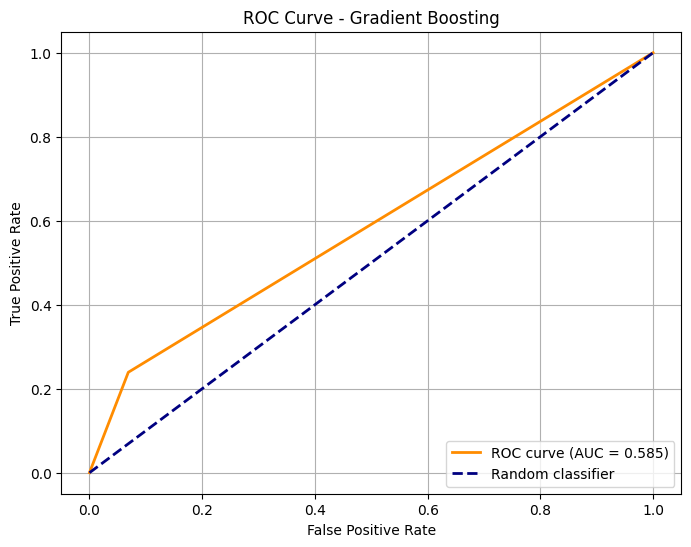

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [78]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

# Создаем матрицу для сохранения результатов
f1_matrix = np.zeros((len(learning_rate_list), len(n_estimators_list)))

# Перебираем параметры
best_f1 = 0
best_params = {}

for i, lr in enumerate(learning_rate_list):
    for j, n_est in enumerate(n_estimators_list):
        # Создаем и обучаем модель
        gb_model = GradientBoostingClassifier(
            learning_rate=lr,
            n_estimators=n_est,
            random_state=42
        )
        
        gb_model.fit(X_train, y_train)
        
        # Предсказания и оценка качества
        y_pred = gb_model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Сохраняем результат
        f1_matrix[i, j] = f1
        
        # Сохраняем лучшие параметры
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'learning_rate': lr, 'n_estimators': n_est}

print(f"Лучшие параметры: {best_params}")
print(f"Лучший F1-score: {best_f1:.4f}")

Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 700}
Лучший F1-score: 0.8450


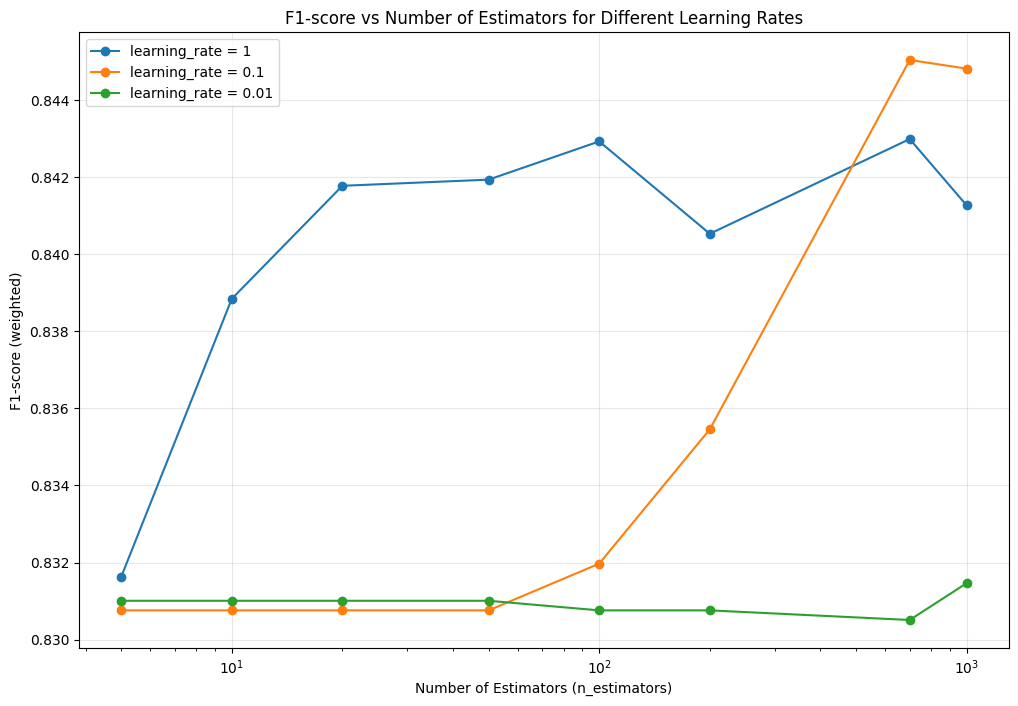

In [79]:
### Your code is here

# Кривые обучения для разных learning_rate
plt.figure(figsize=(12, 8))

for i, lr in enumerate(learning_rate_list):
    # Для каждого learning_rate получаем значения F1 по n_estimators
    f1_scores = f1_matrix[i, :]
    plt.plot(n_estimators_list, f1_scores, marker='o', label=f'learning_rate = {lr}')

plt.xscale('log')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('F1-score (weighted)')
plt.title('F1-score vs Number of Estimators for Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

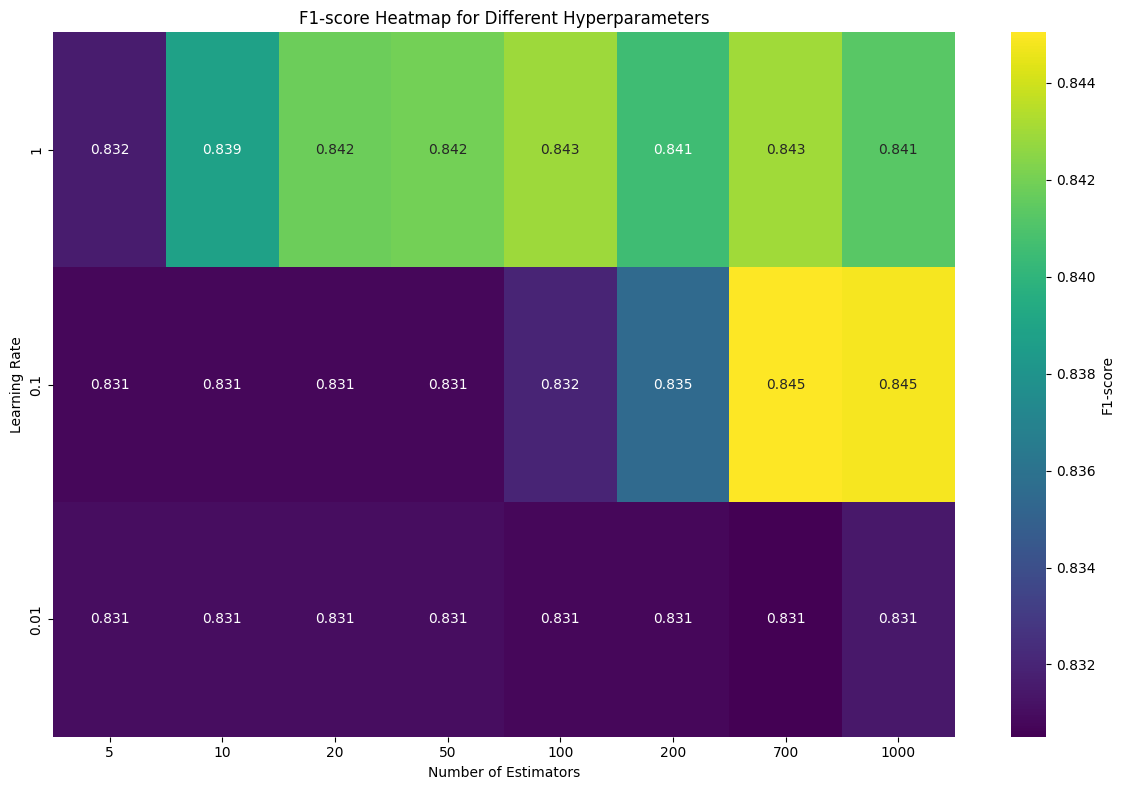

In [80]:
# 2. Heatmap матрицы F1-score
plt.figure(figsize=(12, 8))
sns.heatmap(f1_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='viridis',
            xticklabels=n_estimators_list,
            yticklabels=learning_rate_list,
            cbar_kws={'label': 'F1-score'})

plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.title('F1-score Heatmap for Different Hyperparameters')
plt.tight_layout()
plt.show()

In [81]:
# 3. Детальный анализ для лучших параметров
print("\nДетальный анализ лучшей модели:")
best_model = GradientBoostingClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print(f"Learning rate: {best_params['learning_rate']}")
print(f"Number of estimators: {best_params['n_estimators']}")
print(f"Final F1-score: {best_f1:.4f}")


Детальный анализ лучшей модели:
Learning rate: 0.1
Number of estimators: 700
Final F1-score: 0.8450


**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [82]:
from sklearn.ensemble import RandomForestClassifier

models = {
    'Random Forest (max_depth=5)': RandomForestClassifier(max_depth=5, random_state=42),
    'Random Forest (max_depth=5000)': RandomForestClassifier(max_depth=5000, random_state=42),
    'Gradient Boosting (max_depth=5)': GradientBoostingClassifier(max_depth=5, random_state=42),
    'Gradient Boosting (max_depth=5000)': GradientBoostingClassifier(max_depth=5000, random_state=42)
}
# Создаем словари для хранения результатов
train_scores = {}
test_scores = {}

# Обучаем модели и собираем метрики
for model_name, model in models.items():
    print(f"Обучаем {model_name}...")
    
    train_f1_scores = []
    test_f1_scores = []
    
    for n_est in n_estimators_list:
        # Устанавливаем количество estimators
        if 'Random Forest' in model_name:
            model.set_params(n_estimators=n_est)
        else:  # Gradient Boosting
            model.set_params(n_estimators=n_est, learning_rate=0.1)
        
        # Обучаем модель
        model.fit(X_train, y_train)
        
        # Предсказания на тренировочной и тестовой выборках
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Считаем F1-score
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        
        train_f1_scores.append(train_f1)
        test_f1_scores.append(test_f1)
    
    # Сохраняем результаты
    train_scores[model_name] = train_f1_scores
    test_scores[model_name] = test_f1_scores

Обучаем Random Forest (max_depth=5)...
Обучаем Random Forest (max_depth=5000)...
Обучаем Gradient Boosting (max_depth=5)...
Обучаем Gradient Boosting (max_depth=5000)...


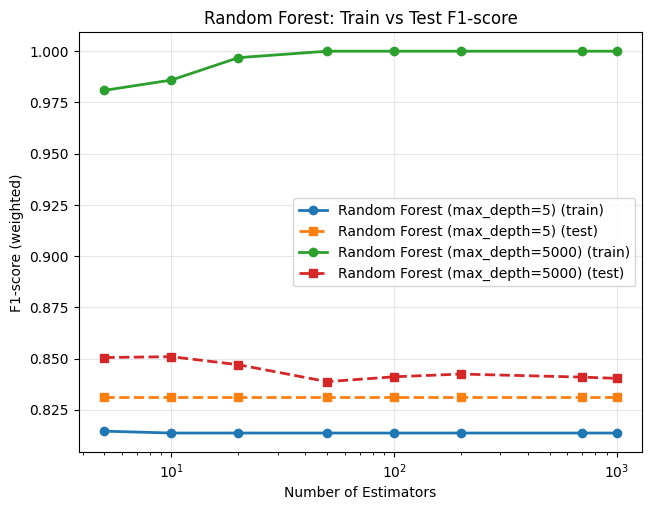

In [83]:
# Визуализация результатов
plt.figure(figsize=(16, 12))

# График для Random Forest
plt.subplot(2, 2, 1)
for model_name in ['Random Forest (max_depth=5)', 'Random Forest (max_depth=5000)']:
    plt.plot(n_estimators_list, train_scores[model_name], 
             marker='o', linewidth=2, label=f'{model_name} (train)')
    plt.plot(n_estimators_list, test_scores[model_name], 
             marker='s', linewidth=2, linestyle='--', label=f'{model_name} (test)')

plt.xscale('log')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-score (weighted)')
plt.title('Random Forest: Train vs Test F1-score')
plt.legend()
plt.grid(True, alpha=0.3)

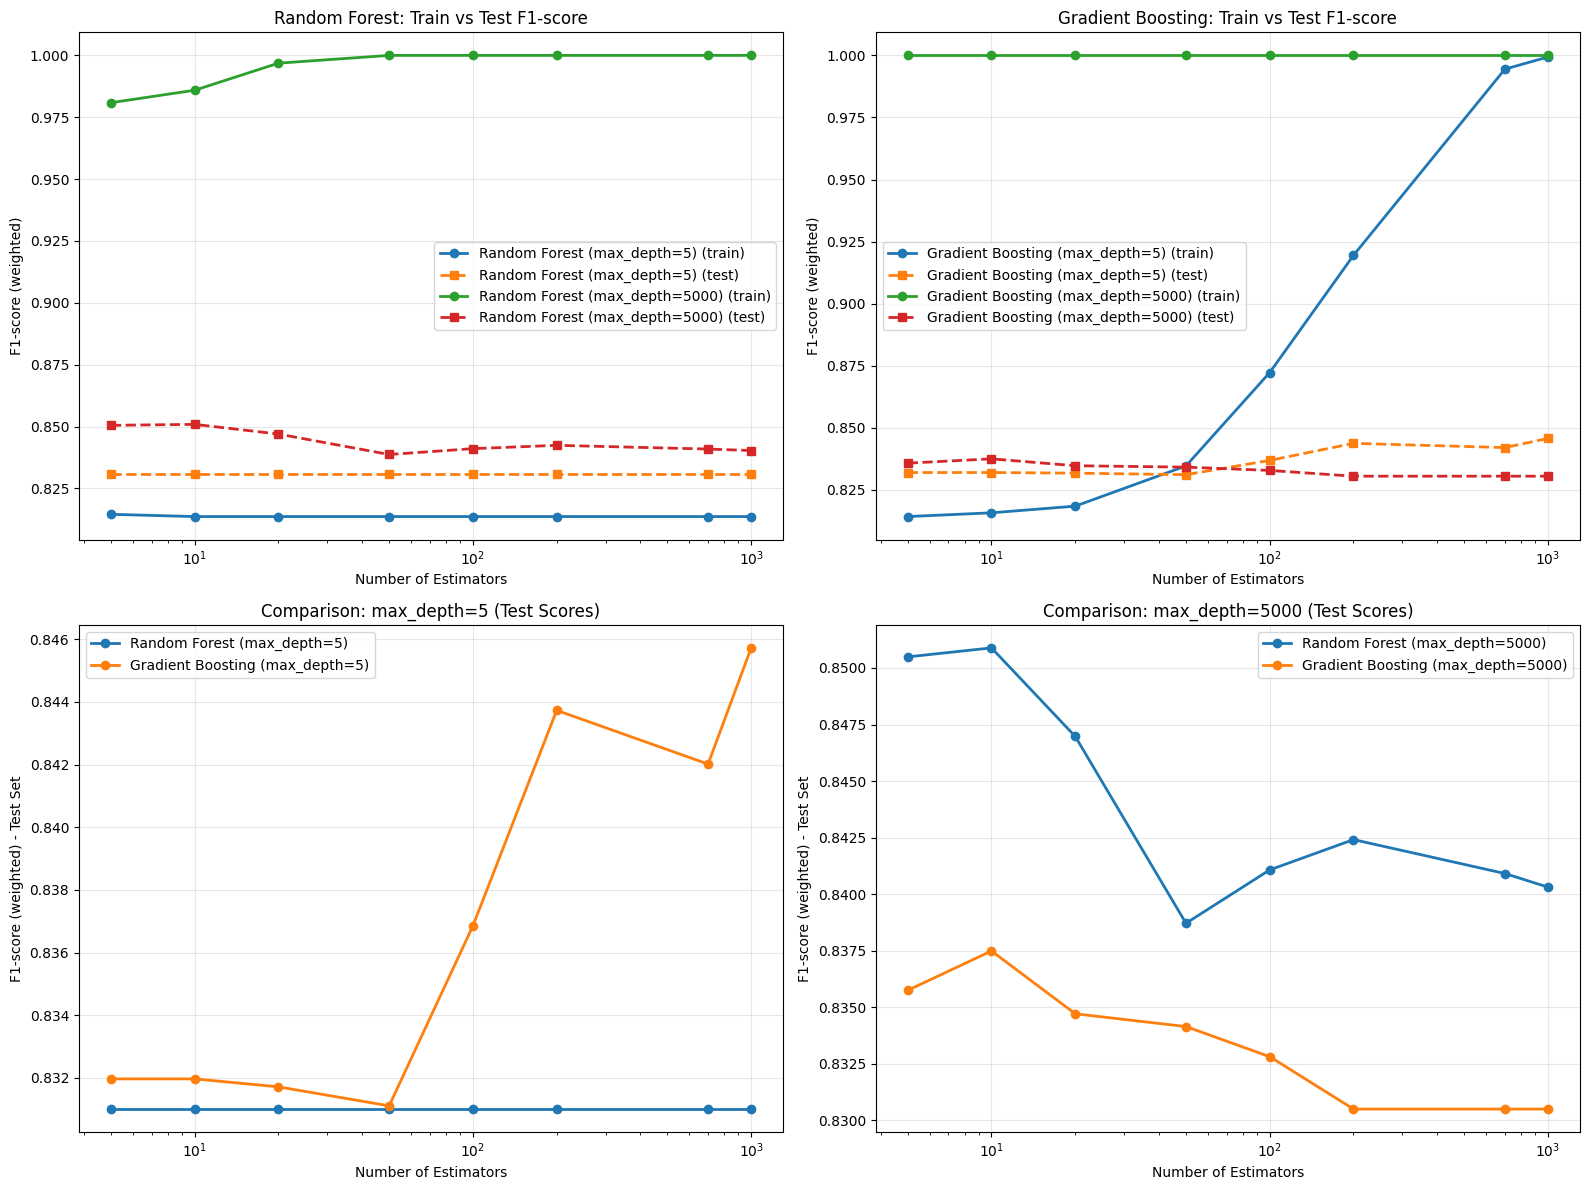

In [84]:
# Визуализация результатов
plt.figure(figsize=(16, 12))

# График для Random Forest
plt.subplot(2, 2, 1)
for model_name in ['Random Forest (max_depth=5)', 'Random Forest (max_depth=5000)']:
    plt.plot(n_estimators_list, train_scores[model_name], 
             marker='o', linewidth=2, label=f'{model_name} (train)')
    plt.plot(n_estimators_list, test_scores[model_name], 
             marker='s', linewidth=2, linestyle='--', label=f'{model_name} (test)')

plt.xscale('log')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-score (weighted)')
plt.title('Random Forest: Train vs Test F1-score')
plt.legend()
plt.grid(True, alpha=0.3)

# График для Gradient Boosting
plt.subplot(2, 2, 2)
for model_name in ['Gradient Boosting (max_depth=5)', 'Gradient Boosting (max_depth=5000)']:
    plt.plot(n_estimators_list, train_scores[model_name], 
             marker='o', linewidth=2, label=f'{model_name} (train)')
    plt.plot(n_estimators_list, test_scores[model_name], 
             marker='s', linewidth=2, linestyle='--', label=f'{model_name} (test)')

plt.xscale('log')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-score (weighted)')
plt.title('Gradient Boosting: Train vs Test F1-score')
plt.legend()
plt.grid(True, alpha=0.3)

# Сравнение моделей с max_depth=5
plt.subplot(2, 2, 3)
for model_name in ['Random Forest (max_depth=5)', 'Gradient Boosting (max_depth=5)']:
    plt.plot(n_estimators_list, test_scores[model_name], 
             marker='o', linewidth=2, label=model_name)

plt.xscale('log')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-score (weighted) - Test Set')
plt.title('Comparison: max_depth=5 (Test Scores)')
plt.legend()
plt.grid(True, alpha=0.3)

# Сравнение моделей с max_depth=5000
plt.subplot(2, 2, 4)
for model_name in ['Random Forest (max_depth=5000)', 'Gradient Boosting (max_depth=5000)']:
    plt.plot(n_estimators_list, test_scores[model_name], 
             marker='o', linewidth=2, label=model_name)

plt.xscale('log')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-score (weighted) - Test Set')
plt.title('Comparison: max_depth=5000 (Test Scores)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [17]:
from catboost import CatBoostClassifier

### Your code is here
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

cat_features = X.select_dtypes(include=['object']).columns.tolist()

catboost_model = CatBoostClassifier(
    random_state=42,
    cat_features=cat_features,
    verbose=100 
)

catboost_model.fit(X_train, y_train)

Learning rate set to 0.025035
0:	learn: 0.6529943	total: 61ms	remaining: 1m
100:	learn: 0.2715078	total: 177ms	remaining: 1.58s
200:	learn: 0.2580290	total: 290ms	remaining: 1.15s
300:	learn: 0.2485911	total: 401ms	remaining: 932ms
400:	learn: 0.2391271	total: 514ms	remaining: 768ms
500:	learn: 0.2306231	total: 627ms	remaining: 625ms
600:	learn: 0.2226598	total: 740ms	remaining: 491ms
700:	learn: 0.2155251	total: 853ms	remaining: 364ms
800:	learn: 0.2084865	total: 971ms	remaining: 241ms
900:	learn: 0.2016402	total: 1.08s	remaining: 119ms
999:	learn: 0.1954411	total: 1.2s	remaining: 0us


In [18]:
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

f1_score(y_test, y_pred)

0.09665427509293681

In [19]:
feature_importance = catboost_model.get_feature_importance()
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nТоп-10 самых важных признаков:")
print(feature_importance_df.head(10))


Топ-10 самых важных признаков:
                  feature  importance
3      Previously_Insured   30.631808
10     Vehicle_Damage_Yes   15.154272
0                     Age   11.544750
4          Annual_Premium   10.365150
6                 Vintage   10.142435
2             Region_Code    9.342393
5    Policy_Sales_Channel    7.287479
7             Gender_Male    2.818109
8    Vehicle_Age_< 1 Year    2.081667
9   Vehicle_Age_> 2 Years    0.604087


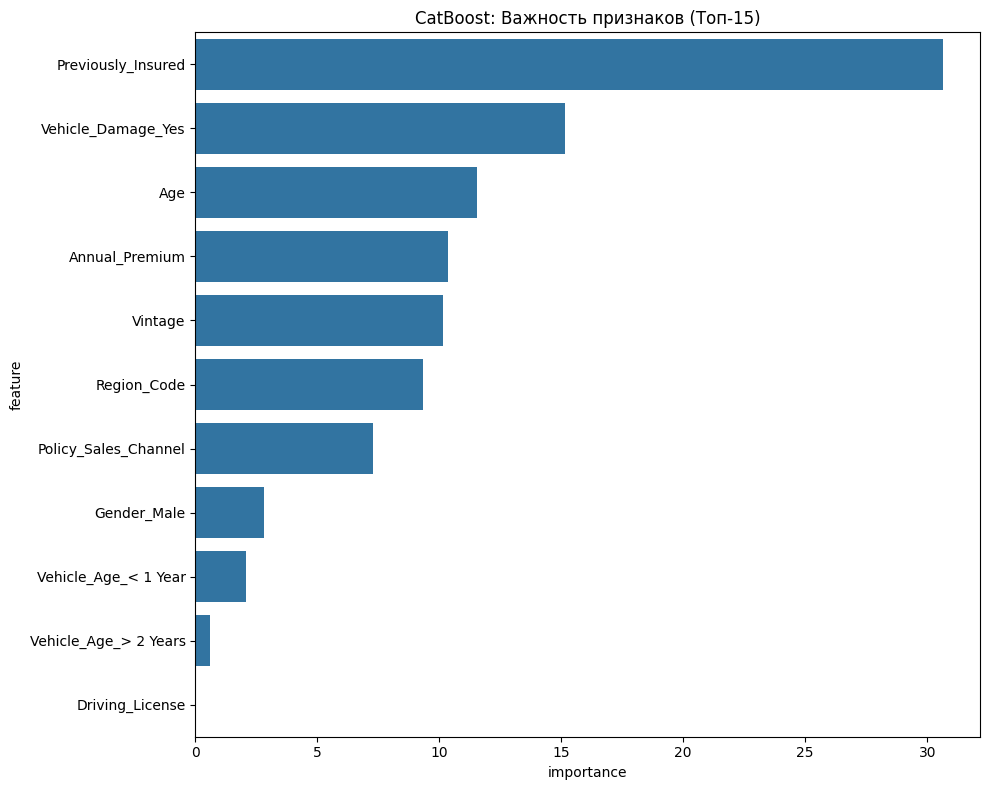

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('CatBoost: Важность признаков (Топ-15)')
plt.tight_layout()
plt.show()


**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

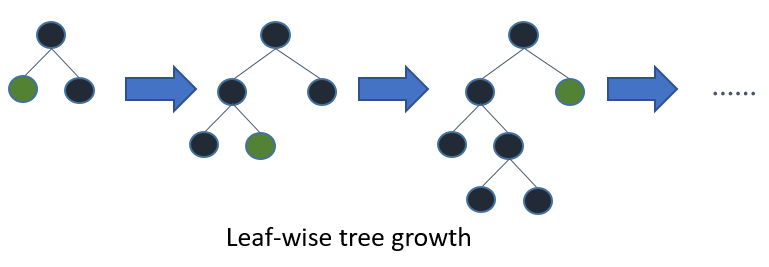

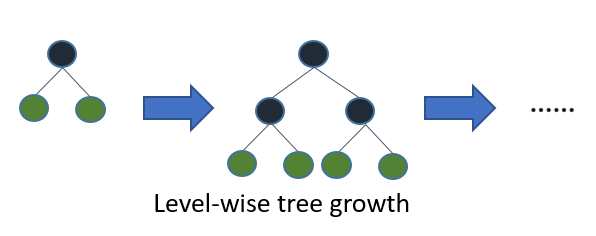

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [29]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

cat_features = X.select_dtypes(include=['object']).columns.tolist()

lgb_model = LGBMClassifier(
    random_state=42,
    verbosity=-1,  # Отключаем вывод
    force_col_wise=True  # Для избежания предупреждений
)

grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=params,
    scoring='f1',  # Используем F1-score для оценки
    verbose=1,
    n_jobs=-1  # Используем все доступные ядра
)

# Запускаем поиск
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,LGBMClassifie... verbosity=-1)
,param_grid,"{'learning_rate': [0.1, 0.01, ...], 'max_depth': [2, 3, ...], 'n_estimators': [100, 500, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [30]:
best_lgb_model = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_pred = best_lgb_model.predict(X_test)
y_pred_proba = best_lgb_model.predict_proba(X_test)[:, 1]

f1_score(y_test, y_pred)

0.24449877750611246

In [31]:
# Детальный отчет
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1770
           1       0.28      0.22      0.24       230

    accuracy                           0.85      2000
   macro avg       0.59      0.57      0.58      2000
weighted avg       0.83      0.85      0.84      2000

